In [1]:
# Install the necessary libraries (if not already installed)
# !pip install yfinance pandas

import yfinance as yf
import pandas as pd

# Define the tickers
selected_tickers = ['USDT-GBP', 'SOL-GBP', 'ETH-GBP', 'AR-GBP']

# Fetch historical data
def fetch_historical_data(tickers):
    data = yf.download(tickers, start='2020-01-01', end='2024-04-30')['Adj Close']
    return data

historical_data = fetch_historical_data(selected_tickers)
print(historical_data.tail())  # Display the last few rows of data


/Users/ashishlama/anaconda3/lib/python3.11/site-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  4 of 4 completed

Ticker         AR-GBP      ETH-GBP     SOL-GBP  USDT-GBP
Date                                                    
2024-04-24  26.879570  2585.382812  124.215248  0.803011
2024-04-25  26.457470  2520.064209  118.582909  0.802459
2024-04-26  28.605165  2523.761963  115.847336  0.799404
2024-04-27  24.784439  2506.338623  111.381546  0.800465
2024-04-28  29.588943  2670.496338  114.916832  0.800851


20:16:57 - cmdstanpy - INFO - Chain [1] start processing
20:16:58 - cmdstanpy - INFO - Chain [1] done processing


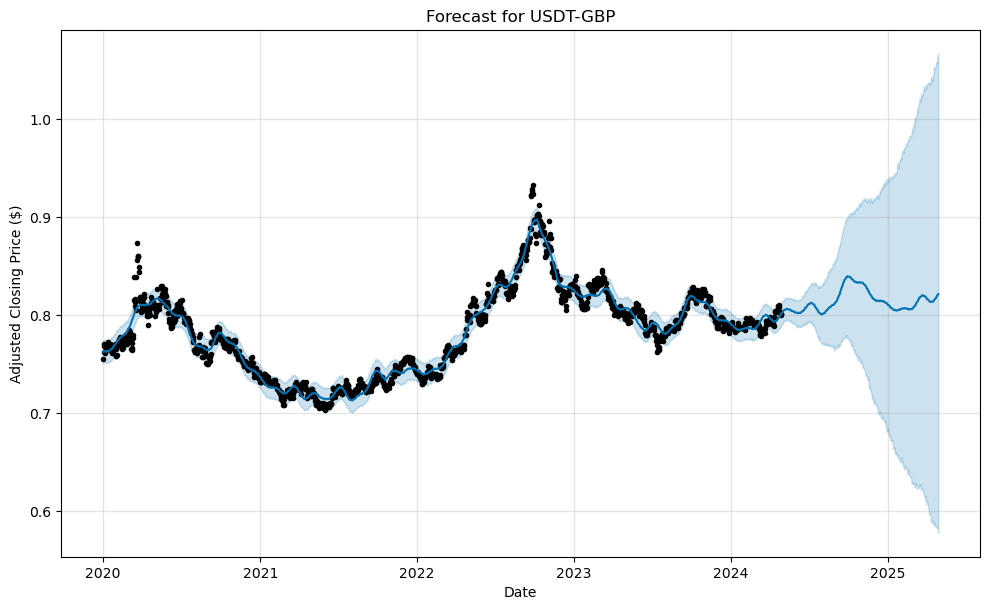

In [8]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Prepare data for Prophet
df = historical_data.reset_index()
df.rename(columns={'Date': 'ds'}, inplace=True)
df['y'] = df['USDT-GBP']  # Choose one ticker as the target variable

# Initialize Prophet model
model = Prophet()

# Fit the model
model.fit(df)

# Generate future time points for prediction
future_points = 365  # Number of future time points (e.g., 1 year)
future = model.make_future_dataframe(periods=future_points)

# Predict the values for the future time points
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price ($)')
plt.title('Forecast for USDT-GBP')
plt.show()
